# MMA 869: Individual Assignment

Version 1: Updated September 27, 2021

- Gopala Goyal
- 20254605
- Section - 2
- Not an avid reader
- October 21, 2021

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python. You may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and scipy`.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np
np.set_printoptions(precision=2, suppress = True) 
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
print(datetime.datetime.now())

2022-08-14 18:23:39.834152


In [3]:
!which python

'which' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!python --version

Python 3.9.12


In [5]:
!echo $PYTHONPATH

$PYTHONPATH


In [6]:
# TODO: install any packages you need to here. For example:
#pip install unidecode

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every single posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a winner and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descripive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.


## 1.0: Load data 

In [7]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [8]:
#Check nulls
df1.isna().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [9]:
#Summary statistics of the data
df1.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


## 1.1: Clustering Algorithm #1 - KMeans

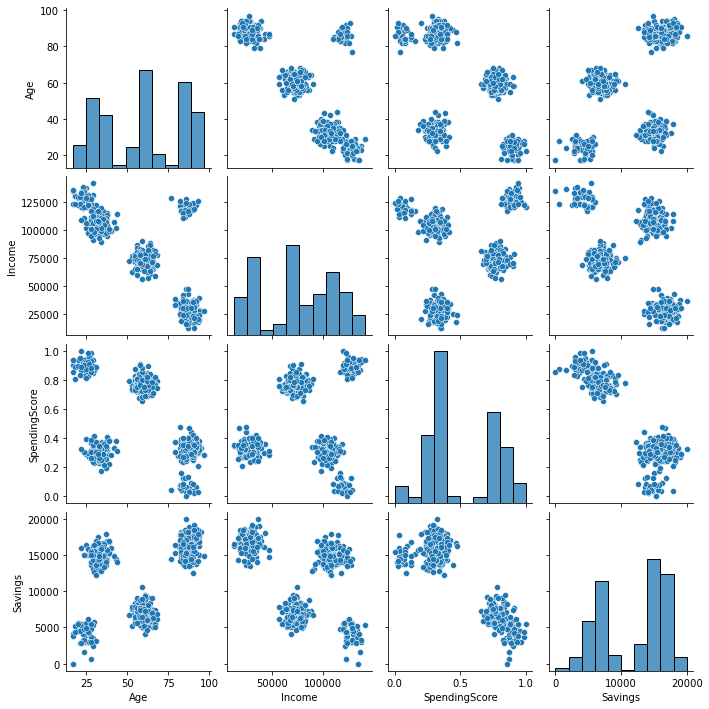

In [10]:
#Plot the scatterplots for every combination of features to determine the right number of clusters
sns.pairplot(df1)

In [11]:
#Function to perform Elbow method plots
def elbow_plt(dataframe):
    wcss=[]
    for i in range(1,10):
        kmeans = KMeans(n_clusters = i,init = 'k-means++',  random_state = 42)
        kmeans.fit(dataframe)
        wcss.append(kmeans.inertia_)

    number_clusters = range(1,10)
    plt.plot(number_clusters,wcss)
    plt.title('The Elbow title')
    plt.xlabel('Number of clusters')
    plt.ylabel('Within Cluster Sum Square')

def silhouette_plt(dataframe):
    sil = []
    for i in range(2,10):
        kmeans = KMeans(n_clusters = i)
        kmeans.fit(dataframe)
        sil.append(silhouette_score(dataframe, kmeans.labels_, metric = 'euclidean'))
        print(sil)
    
    number_clusters = range(2,10)
    plt.plot(number_clusters,sil)
    plt.title('The Elbow title')
    plt.xlabel('K')
    plt.ylabel('Silhoutte Score')

D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

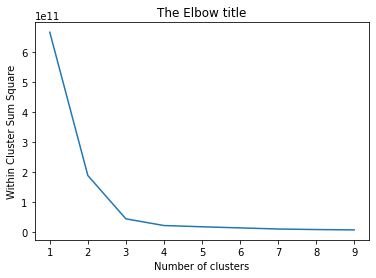

In [12]:
#Original Dataframe Elbow Method - Intertia
elbow_plt(df1)

D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.6547312337772452]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.6547312337772452, 0.7393168523275075]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.6547312337772452, 0.7393168523275075, 0.7207226008574878]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.6547312337772452, 0.7393168523275075, 0.7207226008574878, 0.6776291615650943]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.6547312337772452, 0.7393168523275075, 0.7207226008574878, 0.6776291615650943, 0.5798719072408797]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.6547312337772452, 0.7393168523275075, 0.7207226008574878, 0.6776291615650943, 0.5798719072408797, 0.5157060289189551]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.6547312337772452, 0.7393168523275075, 0.7207226008574878, 0.6776291615650943, 0.5798719072408797, 0.5157060289189551, 0.51980361115202]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.6547312337772452, 0.7393168523275075, 0.7207226008574878, 0.6776291615650943, 0.5798719072408797, 0.5157060289189551, 0.51980361115202, 0.5247157919654156]


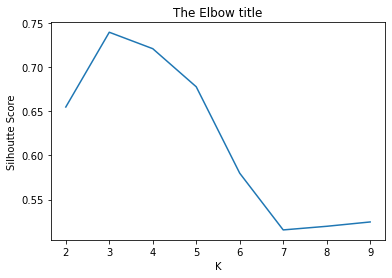

In [13]:
#Original Dataframe Silhouette Score Plot
silhouette_plt(df1)

In [14]:
#Perform scaling on dataset to apply KMeans
scaled_df1 = df1.copy()
scaler = StandardScaler()
scaled_df1[scaled_df1.columns] = scaler.fit_transform(df1)
scaled_df1.head()

,Age,Income,SpendingScore,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

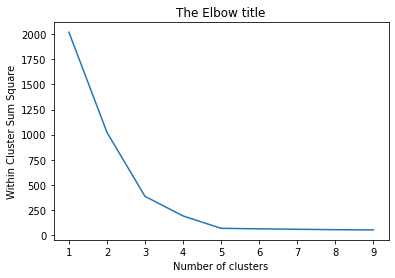

In [15]:
#Scaled Dataframe Elbow Method - Inertia
elbow_plt(scaled_df1)

D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.5212589967674504]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.5212589967674504, 0.6963481945884472]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.5212589967674504, 0.6963481945884472, 0.7581191889903789]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.5212589967674504, 0.6963481945884472, 0.7581191889903789, 0.8048976287755765]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.5212589967674504, 0.6963481945884472, 0.7581191889903789, 0.8048976287755765, 0.6329626627921736]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.5212589967674504, 0.6963481945884472, 0.7581191889903789, 0.8048976287755765, 0.6329626627921736, 0.44419503163242824]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.5212589967674504, 0.6963481945884472, 0.7581191889903789, 0.8048976287755765, 0.6329626627921736, 0.44419503163242824, 0.2994569721471647]


D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[0.5212589967674504, 0.6963481945884472, 0.7581191889903789, 0.8048976287755765, 0.6329626627921736, 0.44419503163242824, 0.2994569721471647, 0.2977660634904018]


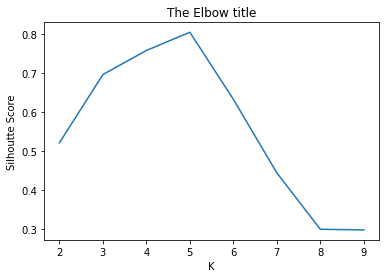

In [16]:
#Scaled Dataframe Silhouette Score Plot
silhouette_plt(scaled_df1)

In [17]:
#Applying K means and performing clustering
#Use Clusters as 5 on the basis of Elblow method
kmeans_scaled = KMeans(init='k-means++', n_clusters=5, random_state=42)
kmeans_scaled.fit(scaled_df1)

D:\MMA\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [18]:
#Evaluation - Silhouette Score
silhouette_score(scaled_df1, kmeans_scaled.labels_)

0.8048976287755765

In [19]:
#Predict the clusters for the dataset
y = kmeans_scaled.predict(scaled_df1)

In [20]:
#Print the mean for each feature of the cluster
for label in set(kmeans_scaled.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(scaled_df1[kmeans_scaled.labels_==label].mean()))


Cluster 0:


ValueError: Expected 2D array, got 1D array instead:
array=[-1.09  0.83 -0.75  0.63].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## 1.2: Clustering Algorithm #2 - DBSCAN

In [ ]:
#Initialize the algorithm and run the FIT method
db_scan = DBSCAN(eps=0.3, min_samples=3)
db_scan.fit(scaled_df1)

In [ ]:
#Fund the silhouette score for the DBSCAN algo
silhouette_score(scaled_df1, db_scan.labels_)

In [ ]:
#Testing the plot for interpretetion purpose
plt.figure();

unique_labels = set(db_scan.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = scaled_df1[db_scan.labels_ == k]
    plt.plot(xy.iloc[:, 1], xy.iloc[:, 2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));

In [ ]:
for label in set(db_scan.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(scaled_df1[db_scan.labels_==label].mean()))

In [ ]:
df_outliers = pd.DataFrame(columns=scaled_df1.columns,data =  scaler.inverse_transform(scaled_df1[db_scan.labels_==-1]))

In [ ]:
df_outliers

In [ ]:
#Elbow method
silhouettes = {}

epss = np.arange(0.1, 0.9, 0.1)
minss = np.arange(3, 10, 1)

ss = np.zeros((len(epss), len(minss)))

for i, eps in enumerate(epss):
    for j, mins in enumerate(minss):
        db = DBSCAN(eps=eps, min_samples=mins).fit(scaled_df1)
        if len(set(db.labels_)) == 1:
            ss[i, j] = -1
        else:
            ss[i, j] = silhouette_score(scaled_df1, db.labels_, metric='euclidean')
    

plt.figure();
for i in range(len(minss)):
    plt.plot(epss, ss[:, i], label="MinPts = {}".format(minss[i]));
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.legend();

In [ ]:
def do_and_plot_dbscan(X, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)

    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) - 1
    
    if n_clusters <= 1:
        #print('eps={}, min_samples={}, n_clusters <= 1. Returning.'.format(eps, min_samples))
        #return
        sil = -1
    else:
        sil = silhouette_score(X, db.labels_)
    
    print("eps={}, min_samples={}, n_clusters={}, sil={}".format(eps, min_samples, n_clusters, sil))
    
    plt.figure();
    
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

    for k in unique_labels:
        if k == -1:        # Black used for noise.
            col = [0, 0, 0, 1]
        else:
            col = colors[k]

        xy = X[db.labels_ == k]
        plt.plot(xy.iloc[:, 1], xy.iloc[:, 2], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8);


    plt.title('');
    plt.title("DBSCAN (eps={}, min_samples={}): n_clusters = {:d}, sil={:.3f})".format(eps, min_samples, n_clusters, sil));
    plt.xlabel('Annual Income (K)');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_dbscan_{}_{}.png'.format(eps, min_samples))
    plt.show()


do_and_plot_dbscan(scaled_df1, 0.3, 2)
do_and_plot_dbscan(scaled_df1, 0.1, 3)
do_and_plot_dbscan(scaled_df1, 0.3, 3)
do_and_plot_dbscan(scaled_df1, 0.6, 3)
do_and_plot_dbscan(scaled_df1, 0.6, 7)
do_and_plot_dbscan(scaled_df1, 0.36, 3)

In [ ]:
df_dbs = scaled_df1.copy()
df_dbs['Cluster'] = db_scan.labels_

In [ ]:
df_dbs

## 1.3 Model Comparison

**Quality of Results:** Both KMeans and DBSCAN algorithms show similar clustering quality in this case. Both of the algorithms have the optimal K as 5 and in terms of the cluster means, the results are similar.
<p> However, KMeans algorithm was not able to detect the outliers and noise in the dataset. </p>
<p> In DBSCAN, a specific cluster that had all the outliers were clustered into a separate cluster with the cluster Id '-1'. 
While analysing the outliers, there were a few instances that did not make sense, 
</p>

**Ease of Use:** In this case, KMeans is easier to use, due to the comparable small dataset, all numeric values and easy package access. For DBSCAN, in addition to the value of K, the value of epsilon parameter that measures the local radius of the clusters had to be determined on the basis of intution and hyperparameter tuning.

**Speed:** Both of these clustering algorithms are efficient and speedy, however, KMeans would be faster on especially larger data because it only supports Eucledian distance to find the clusters.

**Interpretability:** - KMeans and DBSCAN produce similar results however, with the extended output about noise/outliers, interpretetion for DBSCAN becomes comparitively comprehensive and verbose to understand. As we know that for multi-dimentional dataset, the visualizations generated do not convey the right information, having a detailed cluster information helps in interpreting the algorithm easier and both KMeans as well as DBSCAN provide the information in a similar way.

In conclusion, **DBSCAN** performs and produces better insights in this case due to the handling of noise and forming a cluster of outliers. This makes us **understand our data even more comprehensively and helps us wrangle our data even more efficiently**.

P.S. - In the Lecture, we discussed how difficult it is to tune the DBSCAN Algorithm. Here in this example, we had to run the algo training on multiple eps and k values to find the right set of hyperparameters and then choose one. This approach is difficult with a large dataset unlike this one.

#### K means clustering summary

| Cluster | Age | Income | Spending Score | Savings |
| ------- | --- | ------ | -------------- | --------:|
| **Cluster 3**   | 24 | 128,029.12 |0.90 |4,087.52 |
| **Cluster 1**   | 33 | 105,265.81 |0.31 |14,962.78 |
| **Cluster 2**   | 60 | 72,448.06 |0.77 |6,889.97 |
| **Cluster 4**   | 86 | 119,944.04 |0.07 |14,808.68 |
| **Cluster 0**   | 88 | 27,866.1 |0.33 |16,659.26 |

#### DBSCAN clustering summary

| Cluster | Age | Income | Spending Score | Savings |
| ------- | --- | ------ | -------------- | --------:|
| **Cluster 2**   | 24 | 127777.72 |0.90 |4217.29 |
| **Cluster 4**   | 33 | 105356.33 |0.31 |14999.98 |
| **Cluster 0**   | 60 | 72448.06 |0.77 |6889.97 |
| **Cluster 3**   | 86 | 128,029.12 |0.07 |14514.91 |
| **Cluster 1**   | 88 | 28043.73 |0.33 |16674.37 |

## 1.4 Personas

> **Cluster - Young Entrepreneurs**
<p>These are the Gen-Z entrepreneurs that are in their early 20s and have a passion for earning money as well as spending it lavishly. Their income is high (>120k, maybe MMA students graduating from Smith?), spending score is high(staying in Toronto Downtown) and have limited savings(well, lavish cars, expensive condos and Uncle Steve's high quality diamonds - won't let you save money). They believe in living their life without worrying about the future savings.</p>

> **Cluster - The Family Person**
<p>
    These are the people who are in their early 30s and need to plan for their future, hence have a low spending score and comparitively high savings. These people would spend only on their necessities and have a bulk of their money towards investments, future planning (kids, their education, buying a house?). They have to think before spending money however would not hesitate to shell out money towards some leisure activities.
    They would have spent money in buying diamonds from Uncle Steve
</p>

> **Cluster - Retiring Seniors**
<p>
    These are the set of customers that are going to retire soon. Their presence in the job market is diminishing and their primary source of income is their savings or pensions. They have a high spending score because they are retiring soon and would have planned expenses like buying a retirement home, planning emergency expenses like medical, family expenses etc. Their savings at this stage is quite low because of sudden expenses. They would have spent money in buying diamonds from Uncle Steve to gift them as their child's wedding present.
</p>

> **Cluster - The Forgotten Investors**
<p>
    These are the people who invested their money when they were young and forgot about it. The market kept on booming, their investments multiplied and compunded and now they are millionaires. They have a high monthly income, a very low spending score and a high amount of savings. They have the capability and aim to spend their money on their grand-children, have a positive impact on the society by donating their money and serve the community. They would have bought diamonds for their Grand-Children and are willing to invest in it more. (<b>Thought:</b> Are diamonds even worth investing? Something to research more on!)
</p>

> **Cluster - The Elderly**
<p>
   These are the people who have lived their entire life working hard, saving money, serving the Canadian economy, and now are trying to enjoy their life after retirement. However, they have a low source of income, through pensions, savings, community fundings and barely meet their needs. They have a significant spending score which is mainly for their survival. Rent, medications, grocery etc., all these are components form a major component of their spendings. They don't take part in any leisure activities, hence have a bit of savings.
</p>

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



- Grocery
    - Baking
    - Dairy
    - Drinks
    - Produce
    - Fresh/Frozen
    - Delicacy
- Health and Beauty
- Pharmacy

> I work part-time at Walmart and have seen more number of items available (well, obviously, it's Walmart) but out of the list that is provided at Uncle Steve's Grocery Shop, the following rules and their answers are evident to me in my day-to-day life

## 2.1: A rule that might have high support and high confidence. 

***Thought:*** *Anything that has high chance of being together in the transaction, both frequency and chance/probability*

**Answer:** The rule {Greeting Cards} -> {Cakes} would have high support and confidence, since greeting cards and cakes are usually bought as a gift for occassions. Most of the transactions that contain Greeting cards would have a high chance of having Cakes in the cart too. 
<p>Uncle Steve would not probably find it interesting because these kind of transactions or items do sell frequently. So this would not generate meaningful insights about the transactional data for the store.</p>

## 2.2: A rule that might have reasonably high support but low confidence.

***Thought:*** *We need to find some correlated items that are bought together, but have a low chance of being bought together.*

**Answer:** The rule {Hair Color} -> {Shaving cream} would have high support and low confidence. There is a chance that the people going for monthly grocery shopping might buy hair color and shaving cream togeter. But not necessary when people buy the {Hair Color} will buy {Shaving cream} with a high confidence.
<p>This rule may be interesting to Uncle Steve, since the high support may put two items on the transactions together but they are not bought with high confidence. The store could be re-arranged to handle these personal care products efficiently and in such a way that they get sold together more often</p>

## 2.3: A rule that might have low support and low confidence.

***Thought:*** *We need to find some correlated items that are usually not bought together, and have a low chance too.*

**Answer:** The rule {Drinks} -> {Shampoo, Body wash, Hair goo} would have very low support since these aren't really bought together. 
<p>The chance that people buying Drinks would buy Shampoo/Body Wash/Hair goo fairly low as these are 2 totally different categories. There could be some cases where on a monthly grocery shopping, these items would be bough together, however, there is a very low chance that the people who are buying drinks would also buy Shampoo/Body Wash/Hair Goo in the same transaction.
Uncle Steve would find this intuitive as the people who usually buy groceries on a monthly basis might have this combination but the chance is fairly low and he would not have noticed this. </p>

## 2.4: A rule that might have low support and high confidence.

***Thought:*** *We need to find some correlated items that are usually not bought together, and have a high chance of being bought together.*

**Answer:** The rule {Medicine/Tylenol} -> {Vegetables, Fruits} would have low support but high confidence because when someone is not well, they usually are adviced to eat healthy (everyone should eat healthy though). So, these items would could be bought together(low support) but there is a high chance that if there is Medicine in a transaction, fruits and vegetables would be present in the transaction too.
<p>Fruits and vegetables are healthy and aid in faster recovery of a disease, however, this is subjective. To a model that is generating rules and Uncle Steve, this rule would be interesting as this is not so common transaction and would be providing critical insights. </p>

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [70]:
#Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [33]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [34]:
#Data Exploration
df3.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,BadCredit,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,0,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,0,3235,0,12,Lake Debra,NewCar,1978-06-02
2,892-81-4890,F,0,Shannon,Smith,0,0,2,845 Kelly Estate,48A•281,0,3108,1,30,North Judithbury,NewCar,1972-03-18
3,081-11-7963,F,0,Christina,Brooks,2,1,3,809 Burns Creek,30Z J39,1,4014,1,36,Lake Chad,Other,1985-02-26
4,347-03-9639,M,0,Ralph,Anderson,1,5,1,248 Brandt Plains Apt. 465,71-Q331,1,3823,0,18,North Judithbury,Vacation,1983-08-08


In [35]:
#Check the dimentions of the dataset
df3.shape

(6000, 17)

In [36]:
#Check Unique Values for Feature
df3.Purpose.unique()

array(['Vacation', 'NewCar', 'Other', 'UsedCar', 'Household', 'Business',
       'Education', 'Repair'], dtype=object)

In [37]:
#Check Unique Values for Feature
df3.City.unique()

array(['Port Keith', 'Lake Debra', 'North Judithbury', 'Lake Chad',
       'East Jill', 'Ericmouth', 'East Jessetown', 'Ramirezstad',
       'Lisatown', 'New Roberttown', 'North Noahstad', 'Robinsonshire',
       'New Kellystad', 'New Jessica', 'West Michael', 'Jacquelineland',
       'Lake Roberto', 'Cassandraton', 'Herrerafurt', 'Port Jesseville'],
      dtype=object)

<AxesSubplot:>

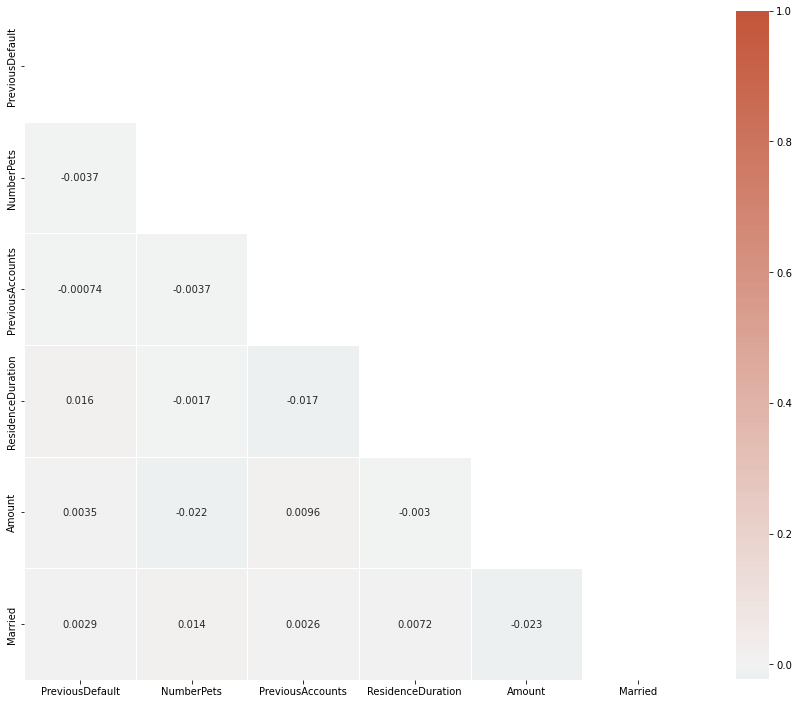

In [38]:
#Correlation plot
plt.figure(figsize = (15,15))
corr_matrix = X_train.corr()
mask = np.triu(np.ones_like(corr_matrix.iloc[:-1,:-1], dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix.iloc[:-1,:-1],mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .82})

array([[<AxesSubplot:title={'center':'PreviousDefault'}>,
        <AxesSubplot:title={'center':'NumberPets'}>,
        <AxesSubplot:title={'center':'PreviousAccounts'}>],
       [<AxesSubplot:title={'center':'ResidenceDuration'}>,
        <AxesSubplot:title={'center':'Amount'}>,
        <AxesSubplot:title={'center':'Married'}>],
       [<AxesSubplot:title={'center':'Duration'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

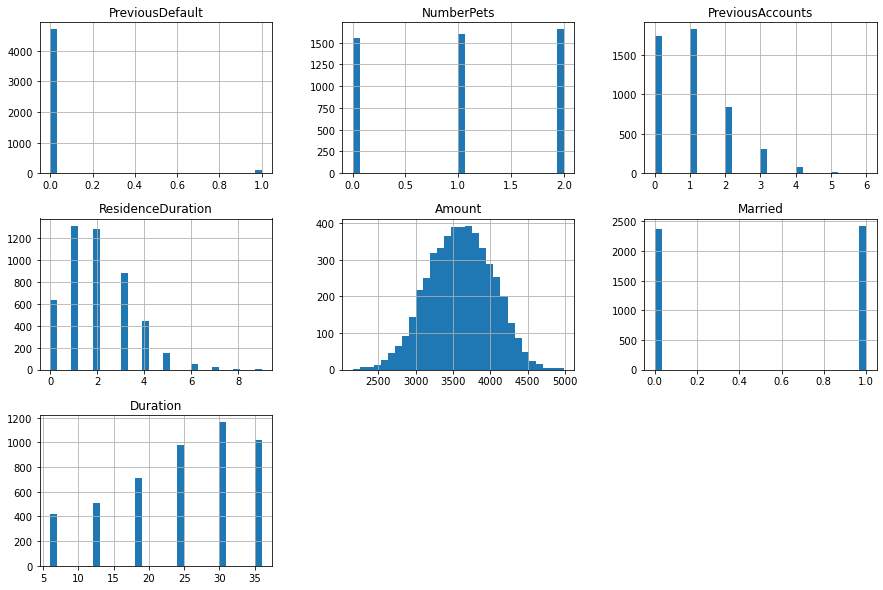

In [39]:
#Histogram to see the distribution of Dataset
X_train.hist(bins=30, figsize=(15, 10))

In [40]:
#Copy Training dataset
X_train_cp = X_train.copy()

In [41]:
#Drop unwanted columns
X_train_cp = X_train_cp.drop(['UserID','FirstName','LastName','Street','LicensePlate', 'DateOfBirth'], axis=1)

In [42]:
#Segregate Features
drop_features = ['UserID', 'DateOfBirth', 'FirstName', "LastName", 'Street', 'LicensePlate']
numeric_feat = ['NumberPets','Amount','Duration','ResidenceDuration','PreviousAccounts']
categorical_feat = ['Sex','PreviousDefault','Married','City','Purpose']

#### Explore Pycaret Base Model

In [43]:
#Prepare Dataset for PyCaret
df3_pyc = df3.copy()
df3_pyc.drop(columns = drop_features, inplace = True)
df3_pyc.drop(columns = 'BadCredit', inplace = True)
numeric_feat = ['NumberPets','Amount','Duration','ResidenceDuration','PreviousAccounts']
categorical_feat = ['Sex','PreviousDefault','Married','City','Purpose']
df3_pyc['BadCredit'] = y

In [44]:
#Run Classification Dataset Setup for PyCaret
from pycaret.classification import *
clasf = setup(data = df3_pyc, target = 'BadCredit', numeric_features=numeric_feat)

,Description,Value
0,session_id,8690
1,Target,BadCredit
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(6000, 11)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [45]:
#Compare Models using PyCaret
cmp_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8362,0.8395,0.2347,0.5581,0.3282,0.2525,0.2842,0.0330
lr,Logistic Regression,0.8328,0.8295,0.2250,0.5346,0.3144,0.2372,0.2670,1.1800
ridge,Ridge Classifier,0.8316,0.0000,0.0764,0.5914,0.1335,0.0974,0.1633,0.0230
ada,Ada Boost Classifier,0.8292,0.8361,0.2667,0.5090,0.3482,0.2609,0.2799,0.1560
catboost,CatBoost Classifier,0.8266,0.8281,0.2569,0.5007,0.3376,0.2491,0.2688,1.0910
rf,Random Forest Classifier,0.8257,0.8160,0.2042,0.4857,0.2857,0.2050,0.2309,0.4800
gbc,Gradient Boosting Classifier,0.8252,0.8335,0.2597,0.4854,0.3366,0.2468,0.2636,0.2810
lightgbm,Light Gradient Boosting Machine,0.8230,0.8208,0.2958,0.4779,0.3639,0.2679,0.2790,1.3800
et,Extra Trees Classifier,0.8207,0.7754,0.1486,0.4339,0.2207,0.1462,0.1735,0.5320
knn,K Neighbors Classifier,0.8142,0.7642,0.3139,0.4395,0.3643,0.2599,0.2656,0.0990


#### Base Model

In [47]:
#Base Model

#Target Encoding on Categorical Features
enc_targ = ce.target_encoder.TargetEncoder(min_samples_leaf=1, smoothing=0, return_df=True)
enc_targ.fit(X_train_cp[categorical_feat], y_train)
X_train_cp[categorical_feat] = enc_targ.transform(X_train_cp[categorical_feat])

#Standard Scaling on Numeric Features
scaler = StandardScaler()
scaler.fit(X_train_cp[numeric_feat])
X_train_cp[numeric_feat] = scaler.transform(X_train_cp[numeric_feat])

#Apply Logistic Regression as a Base Model
logistic_ = (random_state=42)
logistic_.fit(X_train_cp, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
#Base Model Scoring
scores = cross_validate(logistic_, X_train_cp, y_train, 
                         scoring='f1_micro', cv=10, n_jobs=-1)
scores['test_score'].mean()

0.8370833333333334

In [49]:
scores

{'fit_time': array([0.07, 0.1 , 0.09, 0.12, 0.12, 0.1 , 0.08, 0.09, 0.06, 0.06]),
 'score_time': array([0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ]),
 'test_score': array([0.83, 0.82, 0.84, 0.83, 0.83, 0.85, 0.86, 0.85, 0.83, 0.82])}

## 3.2: Feature engineering

In [50]:
#Calculate Age of the person from the DOB
from datetime import datetime
def getAge(dframe):
    dframe['DateOfBirth'] = pd.to_datetime(X_train.DateOfBirth)
    today = datetime.today()
    age = dframe['DateOfBirth'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
    dframe['age'] = age
    dframe.drop(columns = 'DateOfBirth', inplace = True)
    return dframe

In [51]:
#Feature 1 - Age
X_train_cp = getAge(X_train_cp)

In [52]:
#Feature 2, 3 - Binning & Label Encoding Age and Amount
X_train_cp['age_binned'] = pd.qcut(X_train_cp.age, q=[0, .25, .50, .75, 1])
X_train_cp['amount_binned'] = pd.qcut(X_train_cp.Amount, q=[0, .25, .50, .75, 1])

le_age = LabelEncoder()
le_age.fit(X_train_cp['age_binned'])
X_train_cp['age'] = le_age.transform(X_train_cp['age_binned'])
X_train_cp.drop(columns = 'age_binned', inplace = True)

le_amount = LabelEncoder()
le_amount.fit(X_train_cp['amount_binned'])
X_train_cp['Amount'] = le_amount.transform(X_train_cp['amount_binned'])
X_train_cp.drop(columns = 'amount_binned', inplace = True)

In [54]:
#Run Logistic Regression on the Feature Engineered Dataset
logistic_ = LogisticRegression(random_state=42)
logistic_.fit(X_train_cp, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
#Scoring after Feature Engineering
scores = cross_validate(logistic_, X_train_cp, y_train, 
                         scoring='f1_micro', cv=10, n_jobs=-1)
scores['test_score'].mean()

0.8772916666666667

## 3.3: Feature selection

In [57]:
#Feature Selection Using SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

sel = SelectKBest(k=4)
sel = sel.fit(X_train_cp, y_train)

X_train_fea = sel.transform(X_train_cp)

#Run Logistic Regression on the Feature Selected Dataset
lr_clf_fea = LogisticRegression(random_state=22)
lr_clf_fea.fit(X_train_fea, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=22, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
#Scoring after Feature Selection
scores_fea = cross_validate(lr_clf_fea, X_train_fea, y_train, 
                         scoring='f1_micro', cv=10, n_jobs=-1)
scores_fea['test_score'].mean()

0.8747916666666666

## 3.4: Hyperparameter tuning

In [59]:
from sklearn import decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

param_grid = {
    'C': [3, 4, 5],
    'penalty':["l1","l2"],
    "solver":['lbfgs', 'liblinear', 'sag', 'saga']
}

pipe_best = GridSearchCV(lr_clf_fea, param_grid, cv=10, n_jobs=-1, 
                     scoring='f1_micro', return_train_score=True, verbose=2)

pipe_best = pipe_best.fit(X_train_fea, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 233 out of 240 | elapsed:    4.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    4.9s finished


In [60]:
print(pipe_best.best_score_)
print(pipe_best.best_params_)

0.8783333333333335
{'C': 5, 'penalty': 'l1', 'solver': 'liblinear'}


## 3.5: Performance estimation

In [61]:
X_test_cp = X_test.copy()

In [62]:
X_test_cp.drop(columns = drop_features, inplace = True)

In [63]:
X_test_cp

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose
1782,F,0,1,1,3,3773,0,36,North Judithbury,NewCar
3917,F,0,0,0,3,3412,0,24,Lake Roberto,UsedCar
221,F,0,2,2,0,4146,0,24,West Michael,NewCar
2135,M,0,2,1,1,3608,1,30,East Jessetown,UsedCar
5224,F,0,2,1,1,2947,1,24,North Judithbury,NewCar
...,...,...,...,...,...,...,...,...,...,...
2543,F,0,0,1,0,3133,0,30,Robinsonshire,Household
1773,F,0,1,1,2,3640,0,36,New Roberttown,Household
2846,M,0,2,1,0,3918,1,30,North Judithbury,NewCar
5799,M,0,1,3,2,3135,0,36,North Judithbury,Household


In [64]:
#Test Set transformation
X_test_cp[categorical_feat] = enc_targ.transform(X_test_cp[categorical_feat])
X_test_cp[numeric_feat]=scaler.transform(X_test_cp[numeric_feat])

In [65]:
#Test Set Transformation and feature engineering
X_test_cp['DateOfBirth'] = pd.to_datetime(X_test.DateOfBirth)
today = datetime.today()
age = X_test_cp['DateOfBirth'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
X_test_cp['age'] = age
X_test_cp.drop(columns = 'DateOfBirth', inplace = True)

In [66]:
X_test_cp

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,age
1782,0.168664,0,-0.025508,-0.005157,0.722001,0.417148,0,1.248250,0.171342,0.182131,51
3917,0.168664,0,-1.249886,-0.995216,0.722001,-0.431866,0,-0.029685,0.189024,0.169691,58
221,0.168664,0,1.198870,0.984903,-1.424327,1.294384,0,-0.029685,0.156250,0.182131,50
2135,0.178523,0,1.198870,-0.005157,-0.708884,0.029095,1,0.609282,0.161290,0.169691,58
5224,0.168664,0,1.198870,-0.005157,-0.708884,-1.525471,1,-0.029685,0.171342,0.182131,43
...,...,...,...,...,...,...,...,...,...,...,...
2543,0.168664,0,-1.249886,-0.005157,-1.424327,-1.088029,0,0.609282,0.170635,0.146444,50
1773,0.168664,0,-0.025508,-0.005157,0.006558,0.104354,0,1.248250,0.162741,0.146444,45
2846,0.178523,0,1.198870,-0.005157,-1.424327,0.758165,1,0.609282,0.171342,0.182131,49
5799,0.178523,0,-0.025508,1.974963,0.006558,-1.083325,0,1.248250,0.171342,0.146444,52


In [67]:
#Pre-Processing

X_test_cp['age_binned'] = pd.qcut(X_test_cp.age, q=[0, .25, .50, .75, 1], duplicates='drop')
X_test_cp['amount_binned'] = pd.qcut(X_test_cp.Amount, q=[0, .25, .50, .75, 1], duplicates='drop')

le_age = LabelEncoder()
le_age.fit(X_test_cp['age_binned'])
X_test_cp['age'] = le_age.transform(X_test_cp['age_binned'])
X_test_cp.drop(columns = 'age_binned', inplace = True)

le_amount = LabelEncoder()
le_amount.fit(X_test_cp['amount_binned'])
X_test_cp['Amount'] = le_amount.transform(X_test_cp['amount_binned'])
X_test_cp.drop(columns = 'amount_binned', inplace = True)

X_test_fea = sel.transform(X_test_cp)

In [71]:
#Final Prediction

y_predict = pipe_best.predict(X_test_fea)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       991
           1       0.74      0.52      0.61       209

    accuracy                           0.88      1200
   macro avg       0.82      0.74      0.77      1200
weighted avg       0.88      0.88      0.88      1200



# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



- Cost of maintenance without the predictive model:
For a period of 1 year, with 1 turbine failing every 2 days:
    - Number of Days = 365(Assuming non-leap year)
    - Number of turbines failed = Number of Days/2
    - Cost of repair of one turbine = 20,000
    
    ***Total cost for 1 year of maintenance = (365 / 2) \* 20000 = $3,650,000**

    

- Cost Matrix

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 500+2000 | 20000 |
| **Actual No Fail**   | 500 | - |

- Cost Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 502,500 | 1,100,000 |
| **Actual No Fail**   | 25000 | - |

- Cost Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 565,000 | 600,000 |
| **Actual No Fail**   | 600,000 | - |

**Analysis**

Random Forest - Recall: 0.785; Precision: 0.80
Total cost of repairs - $1,627,500

RNN - Recall: 0.88; Precision: 0.15
Total cost of repairs - $1,765,000


**Best Option**

Random Forest - According to my analysis, using Random Forest algorithm to predict the failures would be a better option rather than the RNN algorithm.
The following reasons support the conclusion:
1. The Total cost difference of using RNN and RF: 1,765,000 - 1,627,500 = 137,500
2. The precision (measure of quality) of both the algorithms play a key role in determining which one to pick. For Random forest, the precision is 0.80 which means 80\% of the times the algorithm predicts that the turbines would fail and they actually fail. This
<p>However for RNN, the precision is just about 0.15 and is dominated by the False positives i.e. the turbine would fail but it does not. </p>
<p>This False Positive(FP) number for RNN costs Uncle Steve a heavy amount(600K) in the inspection charges in comparison to Random forest FP numbers which just cost about 25k. </p>
3. The Recall (measure of quantity) of both the algorithms are similar (not too far off) however due to the False Negatives(FN) being "costlier", the total cost is impacted by the FN numbers too. 

**With the current values in the confusion matrix and looking at the precision of the algorithms, Random Forest is the algorithm that Uncle Steve needs to use for his farm.**
